Epoch 1/20
210/210 [==============================] - 1s 7ms/step - loss: 0.2984 - accuracy: 0.9145 - val_loss: 0.1503 - val_accuracy: 0.9568
Epoch 2/20
210/210 [==============================] - 1s 6ms/step - loss: 0.1088 - accuracy: 0.9675 - val_loss: 0.1122 - val_accuracy: 0.9652
Epoch 3/20
210/210 [==============================] - 1s 7ms/step - loss: 0.0667 - accuracy: 0.9805 - val_loss: 0.0989 - val_accuracy: 0.9706
Epoch 4/20
210/210 [==============================] - 1s 6ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0941 - val_accuracy: 0.9711
Epoch 5/20
210/210 [==============================] - 1s 6ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.1112 - val_accuracy: 0.9682
Epoch 6/20
210/210 [==============================] - 1s 6ms/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0937 - val_accuracy: 0.9735
Epoch 7/20
210/210 [==============================] - 1s 6ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.1031 - val_accuracy: 0.9729
Epoch 

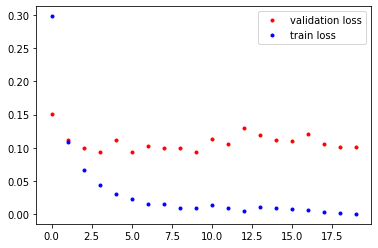

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


np.random.seed(3)
tf.random.set_seed(3)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784).astype(float)/255
x_test = x_test.reshape(x_test.shape[0], 784).astype(float)/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

result = model.fit(x_train, y_train,
                   validation_split=0.3,
                   epochs=20,
                   batch_size=200)
print('accuracy:', model.evaluate(x_test, y_test)[1])
y_vloss = result.history['val_loss']
y_loss = result.history['loss']
x_len = np.arange((len(y_loss)))
plt.plot(x_len, y_vloss, '.', c='red', label='validation loss')
plt.plot(x_len, y_loss, '.', c='blue', label='train loss')
plt.legend(loc='best')
plt.show()